# Introduction to TensorFlow
### TODO: Add index

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches

/home/dg/envs/nn/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dg/envs/nn/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dg/envs/nn/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dg/envs/nn/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarnin

In [2]:
def tf_reset():
    try:
        sess.close()
    except:
        pass
    tf.reset_default_graph()
    return tf.Session()

# 1.1 Constant input

In [3]:
sess = tf_reset()

# define inputs
a = tf.constant(1.0)
b = tf.constant(2.0)

c = a + b

c_run = sess.run(c)

print('c = {0}'.format(c_run))

c = 3.0


# 1.2 Fixed input size

In [4]:
sess = tf_reset()

a = tf.placeholder(dtype=tf.float32 , shape=[1] , name='a_placeholder')
b = tf.placeholder(dtype=tf.float32 , shape=[1] , name='b_placeholder')

c = a + b

c0_run = sess.run(c, feed_dict={a: [1.0] , b: [1.0]})
c1_run = sess.run(c, feed_dict={a: [1.0] , b: [4.0]})

print(f'c0 :{c0_run}')
print(f'c1 :{c1_run}')

c0 :[2.]
c1 :[5.]


# 1.3 Dynamic input size

In [5]:
sess = tf_reset()

a = tf.placeholder(dtype=tf.float32 , shape=[None] , name='a_placeholder')
b = tf.placeholder(dtype=tf.float32 , shape=[None] , name='b_placeholder')

c = a + b

c0_run = sess.run(c, feed_dict={a: [1.0] , b: [1.0]})
c1_run = sess.run(c, feed_dict={a: [1.0, 2.0] , b: [2.0, 4.0]})

print(f'c0 :{c0_run}')
print(f'c1 :{c1_run}')

c0 :[2.]
c1 :[3. 6.]


# 2. Perform computations

In [6]:
sess = tf_reset()

a = tf.constant([[-1.], [-2.], [-1.]], dtype=tf.float32)
b = tf.constant([[1., 2., 3.]], dtype=tf.float32)

In [7]:
c = b + b
print(sess.run(c))

[[2. 4. 6.]]


In [8]:
d = a + b
print(sess.run(d))

[[ 0.  1.  2.]
 [-1.  0.  1.]
 [ 0.  1.  2.]]


In [9]:
matmul = tf.matmul(b, a)
matmul = sess.run(matmul)

print(matmul)

[[-8.]]


# 3. creating variables

In [17]:
# create some data first
sess = tf_reset()

b = tf.constant([[1., 2., 3.]] ,dtype=tf.float32)

b_run = sess.run(b)
print(f'b: {b_run}')

b: [[1. 2. 3.]]


In [18]:
var_init = [[2.0, 4.0, 6.0]]
var = tf.get_variable(name='myvar',
                     shape=[1, 3],
                     dtype=tf.float32,
                     initializer=tf.constant_initializer(var_init))

print(var)

<tf.Variable 'myvar:0' shape=(1, 3) dtype=float32_ref>


In [19]:
print(tf.global_variables())

[<tf.Variable 'myvar:0' shape=(1, 3) dtype=float32_ref>]


In [21]:
c = b + var

print(f'c: {c}')

c: Tensor("add_1:0", shape=(1, 3), dtype=float32)


In [22]:
# we need to init the variables
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [23]:
c_run = sess.run(c)

print(f'c: {c_run}')

c: [[3. 6. 9.]]


# Train a regression model

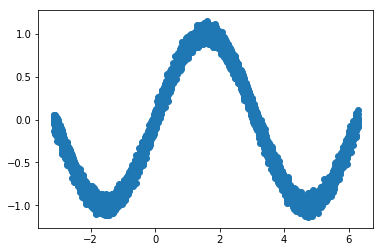

In [39]:
fig = plt.figure()

inputs = np.linspace(-1*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs), 1])

plt.scatter(inputs[:, 0], outputs[:, 0])

plt.show()

In [41]:
sess = tf_reset()

def create_model():
    
    # create inputs
    input_ph = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    output_ph = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    
    # create variables
    W0 = tf.get_variable(name='W0', shape=[1,20], initializer=tf.contrib.layers.xavier_initializer())
    W1 = tf.get_variable(name='W1', shape=[20,20], initializer=tf.contrib.layers.xavier_initializer())
    W2 = tf.get_variable(name='W2', shape=[20,1], initializer=tf.contrib.layers.xavier_initializer())
    
    b0 = tf.get_variable(name='b0', shape=[20], initializer=tf.constant_initializer())
    b1 = tf.get_variable(name='b1', shape=[20], initializer=tf.constant_initializer())
    b2 = tf.get_variable(name='b2', shape=[1], initializer=tf.constant_initializer())
    
    weights = [W0, W1, W2]
    biases = [b0, b1, b2]
    activations = [tf.nn.relu, tf.nn.relu, None]
    
    # create computation graph
    layer = input_ph
    for W, b, activation in zip(weights, biases, activations):
        layer = tf.matmul(layer, W) + b
        if activation is not None:
            layer = activation(layer)
    output_pred = layer
    
    return input_ph, output_ph, output_pred

input_ph, output_ph, output_pred = create_model()

# create loss
mse = tf.reduce_mean(0.5 * tf.square(output_pred - output_ph))

# create optimizer 
opt = tf.train.AdamOptimizer().minimize(mse)

# initialize variables
sess.run(tf.global_variables_initializer())

# create saver to save model variables
saver = tf.train.Saver()

# run training
batch_size = 32

for training_step in range(10000):
    # get a random subset of the training data
    indices = np.random.randint(low=0, high=len(inputs), size=batch_size)
    input_batch = inputs[indices]
    output_batch = outputs[indices]
    
    # run the optimizer and get the mse
    _, mse_run = sess.run([opt, mse], feed_dict={input_ph: input_batch,
                                                 output_ph: output_batch})
    
    # print loss
    if training_step % 1000 == 0:
        print(f'Training step: {training_step}, MSE: {mse_run}')
        saver.save(sess, '/tmp/model.ckpt')

Training step: 0, MSE: 0.5810176134109497
Training step: 1000, MSE: 0.02052655816078186
Training step: 2000, MSE: 0.008089294657111168
Training step: 3000, MSE: 0.002534679602831602
Training step: 4000, MSE: 0.0011034199269488454
Training step: 5000, MSE: 0.001288707833737135
Training step: 6000, MSE: 0.0010189330205321312
Training step: 7000, MSE: 0.0016919346526265144
Training step: 8000, MSE: 0.002273320686072111
Training step: 9000, MSE: 0.0016732694348320365


INFO:tensorflow:Restoring parameters from /tmp/model.ckpt


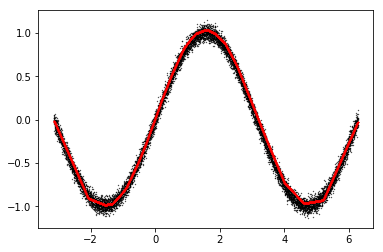

In [43]:
# Use trained model to do predictions
sess = tf_reset()

# create model 
input_ph, output_ph, output_pred = create_model()

# restore the saved model
saver = tf.train.Saver()
saver.restore(sess, '/tmp/model.ckpt')

output_pred_run = sess.run(output_pred, feed_dict={input_ph: inputs})

plt.scatter(inputs[:, 0], outputs[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], output_pred_run[:, 0], c='r', marker='o', s=0.1)